In [1]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')

In [3]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
X = dataset.iloc[:,[2,3]].values
y = dataset.iloc[:,-1].values

In [5]:
# y

In [6]:
trainX, testX, trainY, testY = train_test_split(X,y,test_size=0.2)

In [7]:
print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

(320, 2)
(80, 2)
(320,)
(80,)


In [8]:
sc = StandardScaler()
trainX = sc.fit_transform(trainX)
testX = sc.fit_transform(testX)

C:\Users\asus\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [9]:
clf = SVC(kernel='linear')
clf.fit(trainX,trainY)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [10]:
y_pred = clf.predict(testX)

In [11]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [12]:
accuracy_score(y_pred, testY)

0.825

In [13]:
from matplotlib.colors import ListedColormap

In [17]:
set_x, set_y = trainX, trainY

In [19]:
set_x[:,0].min() - 1

-2.9037670179325876

In [20]:
set_x[:,0].max() + 1

3.231779890264273

In [22]:
np.arange(set_x[:,0].min() - 1, set_x[:,0].max() + 1,step=0.01)

array([-2.90376702, -2.89376702, -2.88376702, -2.87376702, -2.86376702,
       -2.85376702, -2.84376702, -2.83376702, -2.82376702, -2.81376702,
       -2.80376702, -2.79376702, -2.78376702, -2.77376702, -2.76376702,
       -2.75376702, -2.74376702, -2.73376702, -2.72376702, -2.71376702,
       -2.70376702, -2.69376702, -2.68376702, -2.67376702, -2.66376702,
       -2.65376702, -2.64376702, -2.63376702, -2.62376702, -2.61376702,
       -2.60376702, -2.59376702, -2.58376702, -2.57376702, -2.56376702,
       -2.55376702, -2.54376702, -2.53376702, -2.52376702, -2.51376702,
       -2.50376702, -2.49376702, -2.48376702, -2.47376702, -2.46376702,
       -2.45376702, -2.44376702, -2.43376702, -2.42376702, -2.41376702,
       -2.40376702, -2.39376702, -2.38376702, -2.37376702, -2.36376702,
       -2.35376702, -2.34376702, -2.33376702, -2.32376702, -2.31376702,
       -2.30376702, -2.29376702, -2.28376702, -2.27376702, -2.26376702,
       -2.25376702, -2.24376702, -2.23376702, -2.22376702, -2.21

In [23]:
xx, yy = np.meshgrid(np.arange(set_x[:,0].min() - 1, set_x[:,0].max() + 1, step=0.01),
                    np.arange(set_x[:,1].min() - 1, set_x[:,1].max() + 1, step=0.01))

z = clf.predict(np.array([xx.ravel(), yy.ravel()]).T).reshape(xx.shape)


In [24]:
# len(xx)
z

array([[0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1]], dtype=int64)

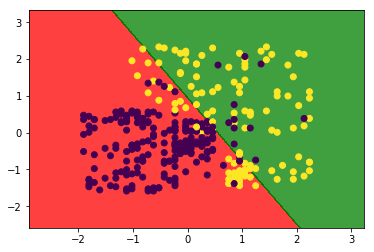

In [26]:
# alpha - opacity
# ListedColorMap - set color for features
plt.contourf(xx, yy, z, alpha = 0.75, cmap = ListedColormap(('red','green')))
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(),yy.max())

plt.scatter(trainX[:,0],trainX[:,1],c=trainY)
# plt.scatter(xx,yy,c=z)
    
plt.show()    